# IBM Attrition Prediction

Link to metadata: http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

- [Importing libraries and dataset](#Importing-libraries-and-dataset)
- [Data Transformation](#Data-Transformation)
  - [One Hot Encoding](#One-Hot-Encoding)
  - [Train-test split](#Train-test-split)
  - [Scaling](#Scaling)
- [Explanatory Data Analysis](#Exploratory-Data-Analysis)
- [Model Building - Logistic Regression](#Model-Building---Logistic-Regression)
  - [Using RFE for feature selection](#Using-RFE-for-feature-selection)
  - [Checking metrics](#Checking-metrics)
    - [ROC Curve from Model 1](#ROC-Curve-from-Model-1)
  - [Handling Class Imbalanced data](#Handling-Class-Imbalanced-data)
  - [1. Oversampling](#1.-Oversampling)
    - [ROC Curve from Model 2](#ROC-Curve-from-Model-2)
  - [2. Undersampling](#2.-Undersampling)
    - [ROC Curve from Model 3](#ROC-Curve-from-Model-3)
  - [3. Using SMOTE: Synthetic Minority Oversampling Technique](#3.-Using-SMOTE:-Synthetic-Minority-Oversampling-Technique)
    - [ROC Curve from Model 4](#ROC-Curve-from-Model-4)

### Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
sns.palette="tab10"
from sklearn.preprocessing import OneHotEncoder
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [3]:
data.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [4]:
# Dropping the column "Over18" and Standard Hours as there is only 1 unique value which doesn't contribute to any info

# Transforming the attrition - yes/no into 1 and 0 respectively
data['Attrition'] = data['Attrition'].replace({"Yes":1,"No":0})

# Transforming the overtime - yes/no into 1 and 0 respectively
data['OverTime'] = data['OverTime'].replace({"Yes":1,"No":0})
data.drop(['Over18','StandardHours'],inplace=True, axis=1)
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7


## Data Transformation

### One Hot Encoding

In [5]:
# One hot encoding
data_dummies = pd.get_dummies(data)
data_dummies.head(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


## Exploratory Data Analysis

<AxesSubplot:>

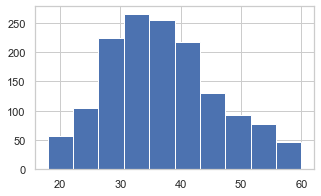

In [6]:
plt.figure(figsize=(5,3))
data_dummies['Age'].hist()

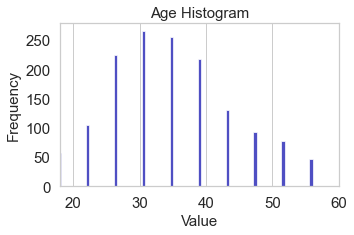

In [7]:
plt.figure(figsize=(5,3))
hist, bin_edges =np.histogram(data_dummies['Age'])
plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Age Histogram',fontsize=15)
plt.show()

In [8]:
print("No attrition: ",round(data_dummies[data_dummies['Attrition'] == 0].shape[0]/len(data_dummies)*100,2),"%")
print("Attrition: ",round(data_dummies[data_dummies['Attrition'] == 1].shape[0]/len(data_dummies)*100,2),"%")

No attrition:  83.88 %
Attrition:  16.12 %


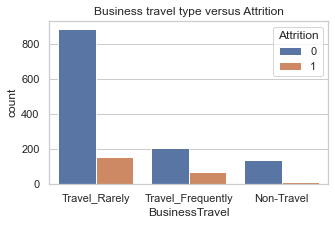

In [9]:
# Travel wise attrition
plt.figure(figsize=(5,3))
sns.countplot(x='BusinessTravel',hue="Attrition",data=data)
plt.title("Business travel type versus Attrition")
plt.show()

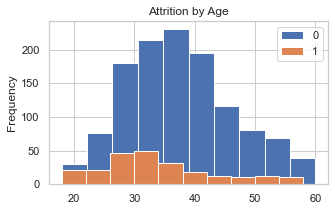

In [10]:
# Attrition by Age groups
plt.figure(figsize=(5,3))
data.groupby("Attrition").Age.plot(kind='hist',legend=True)
plt.title("Attrition by Age")
plt.show()

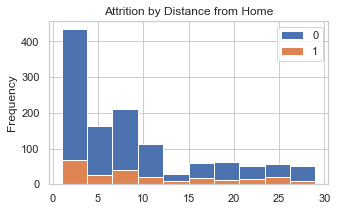

In [11]:
# Attrition by Distance from home groups
plt.figure(figsize=(5,3))
data.groupby("Attrition").DistanceFromHome.plot(kind='hist',legend=True)
plt.title("Attrition by Distance from Home")
plt.show()

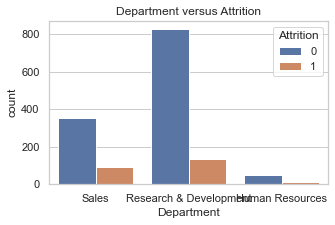

In [12]:
# Department wise attrition
plt.figure(figsize=(5,3))
sns.countplot(x='Department',hue="Attrition",data=data)
plt.title("Department versus Attrition")
plt.show()

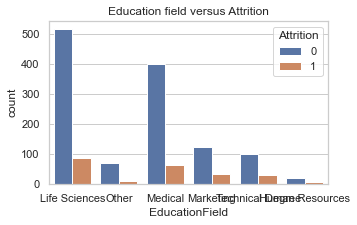

In [13]:
# Education Field wise attrition
plt.figure(figsize=(5,3))
sns.countplot(x='EducationField',hue="Attrition",data=data)
plt.title("Education field versus Attrition")
plt.show()

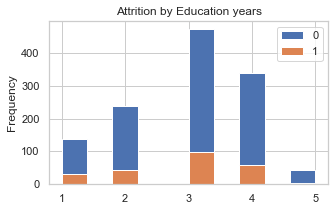

In [14]:
# Attrition by education groups
plt.figure(figsize=(5,3))
data.groupby("Attrition").Education.plot(kind='hist',legend=True)
plt.title("Attrition by Education years")
plt.show()

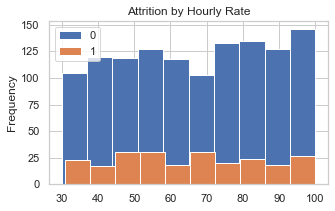

In [15]:
# Attrition by hourly rate
plt.figure(figsize=(5,3))
data.groupby("Attrition").HourlyRate.plot(kind='hist',legend=True)
plt.title("Attrition by Hourly Rate")
plt.show()

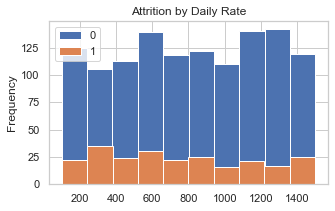

In [16]:
# Attrition by daily rate
plt.figure(figsize=(5,3))
data.groupby("Attrition").DailyRate.plot(kind='hist',legend=True)
plt.title("Attrition by Daily Rate")
plt.show()

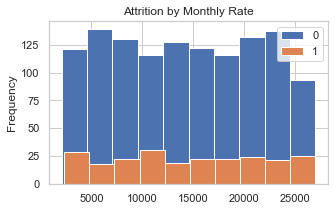

In [17]:
# Attrition by monthly rate
plt.figure(figsize=(5,3))
data.groupby("Attrition").MonthlyRate.plot(kind='hist',legend=True)
plt.title("Attrition by Monthly Rate")
plt.show()

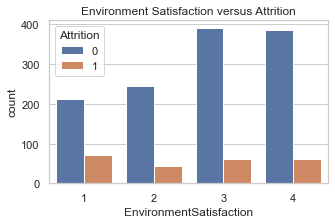

In [18]:
# Environment Satisfaction wise attrition
plt.figure(figsize=(5,3))
sns.countplot(x='EnvironmentSatisfaction',hue="Attrition",data=data)
plt.title("Environment Satisfaction versus Attrition")
plt.show()

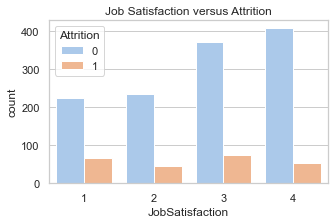

In [21]:
# Job Satisfaction wise attrition
plt.figure(figsize=(5,3))
sns.countplot(x='JobSatisfaction',hue="Attrition",data=data, palette="pastel")
plt.title("Job Satisfaction versus Attrition")
plt.show()

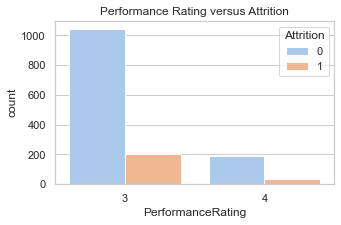

In [20]:
# Performance Rating
plt.figure(figsize=(5,3))
sns.countplot(x='PerformanceRating',hue="Attrition",data=data, palette="pastel")
plt.title("Performance Rating versus Attrition")
plt.show()

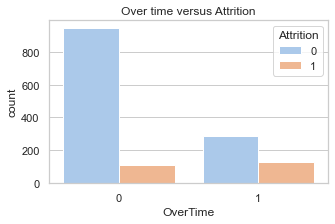

In [23]:
# Overtime
plt.figure(figsize=(5,3))
sns.countplot(x='OverTime',hue="Attrition",data=data, palette="pastel")
plt.title("Over time versus Attrition")
plt.show()

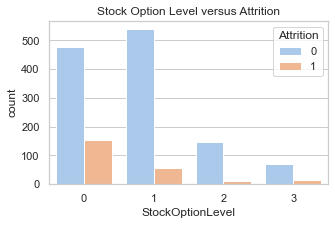

In [24]:
#StockOptionLevel
plt.figure(figsize=(5,3))
sns.countplot(x='StockOptionLevel',hue="Attrition",data=data, palette="pastel")
plt.title("Stock Option Level versus Attrition")
plt.show()

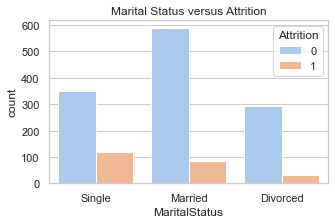

In [25]:
# Performance Rating
plt.figure(figsize=(5,3))
sns.countplot(x='MaritalStatus',hue="Attrition",data=data, palette="pastel")
plt.title("Marital Status versus Attrition")
plt.show()

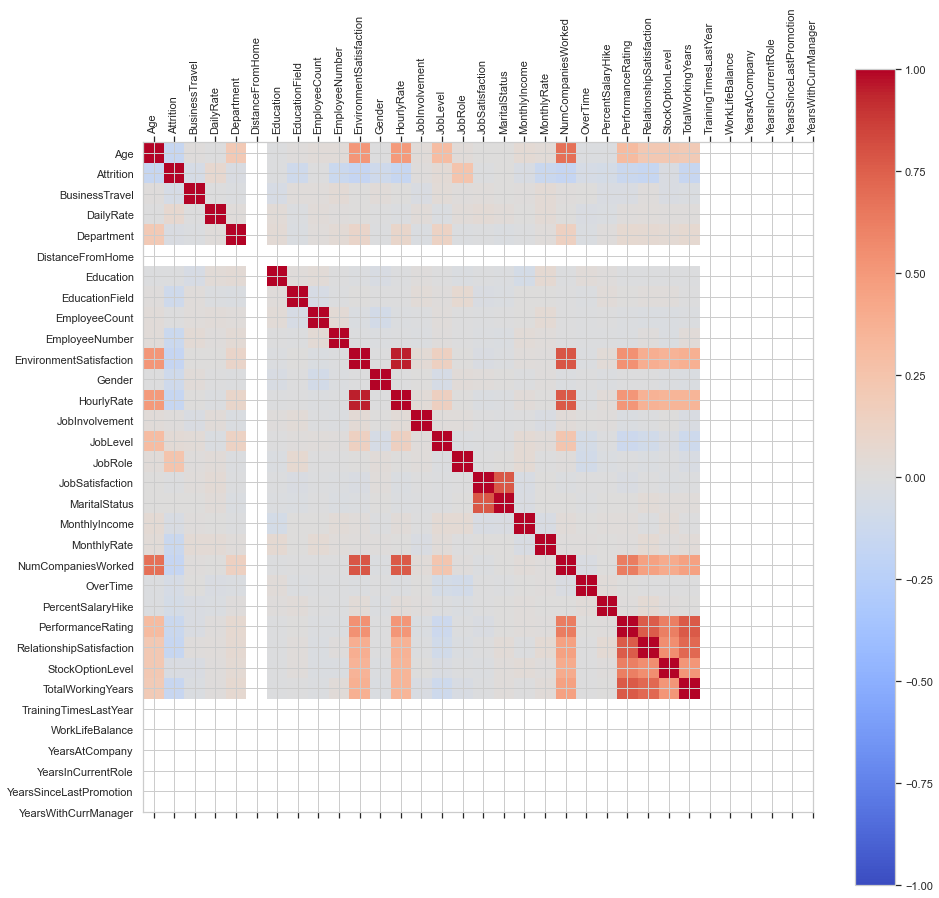

In [27]:
# Checking the correlation of variables
# Since there are too many variables, the colours only reflect for the correlations too high or too low
corr = data.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

## Model Building - Logistic Regression

### Train test split

In [26]:
# Train-test split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X = data_dummies.drop(['Attrition'], axis=1)
y = data_dummies['Attrition']

### Scaling

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Only choosing the features that need to be scaled
to_scale = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','HourlyRate',
            'JobInvolvement','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
           'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
           'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','EmployeeNumber']
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])

In [29]:
# First model with all variables
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 02 Dec 2021   Deviance:                       12987.
Time:                        08:37:24   Pearson chi2:                 6.35e+17
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -5.432e+14   6.11e+06  -8.89e+07      0.000   -5.43e+14   -5.43e+14
Age                               -6.366e+13   2.99e+06  -2.13e+07      0.000   -6.37e+13   -6.37e+13
DailyRate                         -4.343e+13   2.14e+06  -2.03e+07      0.000   -4.34e+13   -4.34e+13
DistanceFromHome                   6.138e+13   2.12e+06    2.9e+07      0.000    6.14e+13    6.14e+13
Education                         -9.759e+12   2.18e+06  -4.47e+06      0.000   -9.76e+12   -9.76e+12
EmployeeCount                         2.4465   3.25e-08   7.52e+07      0.000       2.446       2.446
EmployeeNumber                     -8.89e+13   2.14e+06  -4.15e+07      0.000   -8.89e+13   -8.89e+13
EnvironmentSatisfaction           -1.254e+14   2.14e+06  -5.86e+07      0.000   -1.25e+14   -1.25e+14
HourlyRate                         2.865e+13   2.15e+06   1.33e+07      0.000    2.86e+13    2.86e+13
JobInvolvement                    -1.601e+14   2.15e+06  -7.46e+07      0.000    -1.6e+14    -1.6e+14
JobLevel                          -1.657e+14   6.97e+06  -2.38e+07      0.000   -1.66e+14   -1.66e+14
JobSatisfaction                   -4.526e+13   1.96e+06  -2.31e+07      0.000   -4.53e+13   -4.53e+13
MonthlyIncome                      4.425e+13   8.63e+06   5.13e+06      0.000    4.42e+13    4.42e+13
MonthlyRate                       -6.666e+13   2.13e+06  -3.13e+07      0.000   -6.67e+13   -6.67e+13
NumCompaniesWorked                 1.266e+14   2.34e+06   5.41e+07      0.000    1.27e+14    1.27e+14
OverTime                           3.823e+14   4.77e+06   8.01e+07      0.000    3.82e+14    3.82e+14
PercentSalaryHike                 -5.022e+11    3.4e+06  -1.48e+05      0.000   -5.02e+11   -5.02e+11
PerformanceRating                  2.637e+13   3.39e+06   7.77e+06      0.000    2.64e+13    2.64e+13
RelationshipSatisfaction          -1.241e+14   2.15e+06  -5.77e+07      0.000   -1.24e+14   -1.24e+14
StockOptionLevel                  -3.941e+13   2.95e+06  -1.34e+07      0.000   -3.94e+13   -3.94e+13
TotalWorkingYears                 -1.644e+14   4.57e+06   -3.6e+07      0.000   -1.64e+14   -1.64e+14
TrainingTimesLastYear             -8.234e+13   2.15e+06  -3.83e+07      0.000   -8.23e+13   -8.23e+13
WorkLifeBalance                   -7.225e+13   2.15e+06  -3.36e+07      0.000   -7.22e+13   -7.22e+13
YearsAtCompany                     1.409e+14   4.66e+06   3.02e+07      0.000    1.41e+14    1.41e+14
YearsInCurrentRole                -2.642e+14   3.49e+06  -7.57e+07      0.000   -2.64e+14   -2.64e+14
YearsSinceLastPromotion            2.457e+14   2.84e+06   8.66e+07      0.000    2.46e+14    2.46e+14
YearsWithCurrManager              -1.257e+14   3.46e+06  -3.63e+07      0.000   -1.26e+14   -1.26e+14
BusinessTravel_Non-Trav

### Using RFE for feature selection

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True])

In [32]:
# list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

# Using only the RFE chosen variables for the first model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1023
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -382.70
Date:                Thu, 02 Dec 2021   Deviance:                       765.40
Time:                        08:38:05   Pearson chi2:                 1.07e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.5718      0.201    -12.789      0.000      -2.966      -2.178
OverTime                              1.5824      0.190      8.349      0.000       1.211       1.954
BusinessTravel_Travel_Frequently      0.8906      0.207      4.311      0.000       0.486       1.296
Department_Research & Development    -0.9119      0.215     -4.246      0.000      -1.333      -0.491
JobRole_Laboratory Technician         1.2862      0.248      5.181      0.000       0.800       1.773
MaritalStatus_Single                  1.0153      0.187      5.435      0.000       0.649       1.381
=====================================================================================================
"""

#### Getting the predicted values

In [33]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final['Employee Number'] = y_train.index
y_train_pred_final.head(3)

,Attrition,Attrition_Prob,Employee Number
0,0,0.070974,178
1,0,0.078096,971
2,0,0.174142,1172


#### Creating a new column 'predicted' with 1 if attrition is greater than 0.5

In [34]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Attrition,Attrition_Prob,Employee Number,predicted
0,0,0.070974,178,0
1,0,0.078096,971,0
2,0,0.174142,1172,0
3,1,0.350901,667,0
4,0,0.099973,399,0


### Checking metrics

In [35]:
# Predicted   not_churn  churn
# Actual               
# not_churn      834      28
# churn          127      40 

In [37]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted)
print(confusion)

[[834  28]
 [127  40]]


#### Creating a new column 'predicted_2' considering probability cut off as 0.2

In [38]:
y_train_pred_final['predicted_2'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.2 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted_2)
print(confusion)

[[676 186]
 [ 65 102]]


#### Creating a new column 'predicted_1' considering probability cut off as 0.1

In [39]:
y_train_pred_final['predicted_1'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.1 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted_1)
print(confusion)

[[510 352]
 [ 33 134]]


In [40]:
# Checking each of these columns' accuracies
print("Using 0.5 as the criteria: ",metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))
print("Using 0.2 as the criteria: ",metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted_2))
print("Using 0.1 as the criteria: ",metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted_1))

Using 0.5 as the criteria:  0.8493683187560739
Using 0.2 as the criteria:  0.7560738581146744
Using 0.1 as the criteria:  0.6258503401360545


#### Getting the recall and precision score

In [41]:
# Recall is TP / TP + FN
# Precision is TP / TP + FP

In [101]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
def scores(attrition, prediction):
    precision = precision_score(attrition, prediction)
    recall = recall_score(attrition, prediction)
    print("Precision score: {}\nRecall score: {}".format(precision*100, recall*100))

scores(y_train_pred_final.Attrition,y_train_pred_final.predicted)

Precision score: 58.82352941176471
Recall score: 23.952095808383234


In [52]:
# Probability cut off of 0.2
scores(y_train_pred_final.Attrition,y_train_pred_final.predicted_2)

Precision score: 35.41666666666667
Recall score: 61.07784431137725


In [53]:
# Probability cut off of 0.1
scores(y_train_pred_final.Attrition,y_train_pred_final.predicted_1)

Precision score: 27.572016460905353
Recall score: 80.23952095808383


#### Using the probability cut off of 0.1 is gives the best recall

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,Department_Research & Development,1.88
3,JobRole_Laboratory Technician,1.38
4,MaritalStatus_Single,1.30
0,OverTime,1.27
1,BusinessTravel_Travel_Frequently,1.18


### ROC Curve from Model 1

In [55]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

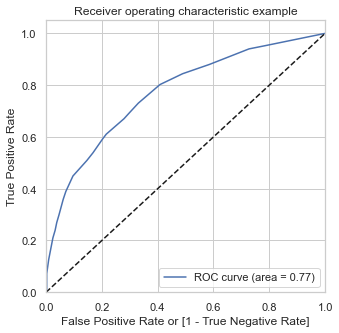

In [56]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

In [57]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Attrition,Attrition_Prob,Employee Number,predicted,predicted_2,predicted_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070974,178,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.078096,971,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.174142,1172,0,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.350901,667,0,1,1,1,1,1,1,0,0,0,0,0,0
4,0,0.099973,399,0,0,0,1,0,0,0,0,0,0,0,0,0


In [58]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.162293  1.000000  0.000000
0.1   0.1  0.625850  0.802395  0.591647
0.2   0.2  0.756074  0.610778  0.784223
0.3   0.3  0.841594  0.389222  0.929234
0.4   0.4  0.847425  0.299401  0.953596
0.5   0.5  0.849368  0.239521  0.967517
0.6   0.6  0.847425  0.071856  0.997680
0.7   0.7  0.847425  0.071856  0.997680
0.8   0.8  0.837707  0.000000  1.000000
0.9   0.9  0.837707  0.000000  1.000000


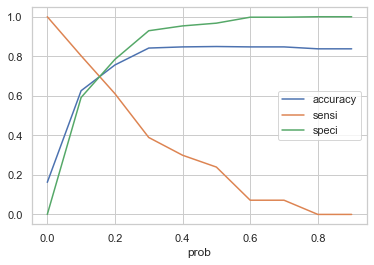

In [59]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Making predictions on the test set

In [60]:
# Transforming the X_test
X_test[to_scale] = scaler.transform(X_test[to_scale])
X_test.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
880,-0.553414,-1.723456,0.445632,0.095583,0.0,0.353594,0.259652,0.530322,-1.021119,1,2,-0.794977,-0.980180,-0.692427,0,1.282012,2.347905,0.280144,0.216725,-1.218027,-0.626800,0.346410,-0.823956,-0.603279,-0.064850,-0.589081,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
152,1.789136,1.582325,-0.404219,-0.878230,0.0,-1.361529,-0.646049,-1.575308,0.366902,2,3,-0.887901,0.223812,-0.294600,1,1.282012,2.347905,1.204081,0.216725,0.220651,0.157844,-2.482606,0.008249,0.767689,0.550183,0.259888,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1466,0.227436,-0.478779,-0.404219,-1.852043,0.0,1.733692,1.165353,-1.183563,-1.021119,3,1,0.746245,0.971127,0.501052,0,-0.082479,-0.425912,-1.567729,0.216725,-0.302505,1.727133,0.346410,0.008249,0.767689,-0.372367,0.825868,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1084,-0.330314,0.417788,-1.011255,0.095583,0.0,0.855296,1.165353,-0.106264,-1.021119,3,3,0.127885,-0.295441,-0.692427,1,-0.355378,-0.425912,1.204081,-0.957013,-0.171716,0.157844,0.346410,0.507573,1.316076,1.780249,0.542878,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1086,1.454486,-1.180006,1.538298,2.043209,0.0,0.861963,0.259652,1.068971,-2.409140,4,4,1.686118,1.384568,-0.692427,1,-0.628276,-0.425912,1.204081,-0.957013,2.705640,-0.626800,0.346410,4.169277,0.493495,3.317832,1.391847,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [64]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Employee Number'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final = y_pred_final.rename(columns={0:'Attrition_Prob'})
y_pred_final.head()

,Attrition,Employee Number,Attrition_Prob
0,0,880,0.213007
1,0,152,0.271035
2,0,1466,0.029777
3,0,1084,0.271035
4,0,1086,0.501143


#### Using 0.1 as the cutoff probability

In [65]:
y_pred_final['final_predicted'] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>0.1 else 0)
print(metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted))

# Confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted)
print(confusion)

0.6031746031746031
[[216 155]
 [ 20  50]]


In [68]:
scores(y_pred_final.Attrition,y_pred_final.final_predicted)

Precision score: 24.390243902439025
Recall score: 71.42857142857143


### Handling Class Imbalanced data

### 1. Oversampling

In [70]:
# Oversampling - adding more data to the minority class

from sklearn.utils import resample
y = data_dummies.Attrition
X = data_dummies.drop('Attrition', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)
# Concatenating the training data back together
X = pd.concat([X_train, y_train], axis=1)
not_attrition = X[X.Attrition == 0]
attrition = X[X.Attrition == 1]
attrition_upsampled = resample(attrition, replace=True, # sample with replacement
                              n_samples = len(not_attrition), random_state = 27)
upsampled = pd.concat([not_attrition, attrition_upsampled])
upsampled.Attrition.value_counts()

0    866
1    866
Name: Attrition, dtype: int64

In [71]:
# Checking the accuracy of the model using the dataset: upsampled
X_train = upsampled.drop("Attrition",axis=1)
y_train = upsampled.Attrition

upsampled_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, upsampled_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1732
Model:                            GLM   Df Residuals:                     1726
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1012.7
Date:                Thu, 02 Dec 2021   Deviance:                       2025.5
Time:                        09:44:31   Pearson chi2:                 1.71e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6799      0.105     -6.459      0.000      -0.886      -0.474
OverTime                              1.6265      0.115     14.153      0.000       1.401       1.852
BusinessTravel_Travel_Frequently      0.8344      0.130      6.430      0.000       0.580       1.089
Department_Research & Development    -0.9959      0.123     -8.088      0.000      -1.237      -0.755
JobRole_Laboratory Technician         0.9840      0.148      6.661      0.000       0.694       1.274
MaritalStatus_Single                  0.7574      0.112      6.742      0.000       0.537       0.978
=====================================================================================================
"""

In [73]:
y_train_pred = res.predict(upsampled_sm).values.reshape(-1)
y_train_pred_final_v1 = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})

y_train_pred_final_v1['predicted'] = y_train_pred_final_v1.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_v1['predicted_1'] = y_train_pred_final_v1.Attrition_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_train_pred_final_v1['predicted_2'] = y_train_pred_final_v1.Attrition_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Checking each of these columns' accuracies
print("Using 0.5 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.predicted))
print("Using 0.2 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.predicted_2))
print("Using 0.1 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.predicted_1))

Using 0.5 as the criteria:  0.674364896073903
Using 0.2 as the criteria:  0.5964203233256351
Using 0.1 as the criteria:  0.5


In [78]:
# Checking with probability cut off of 0.2
scores(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.predicted_2)
confusion = metrics.confusion_matrix(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.predicted_2)
print(confusion)

Precision score: 55.47540983606557
Recall score: 97.6905311778291
[[187 679]
 [ 20 846]]


In [79]:
# Checking with probability cut off of 0.1
scores(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.predicted_1)
confusion = metrics.confusion_matrix(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.predicted_1)
print(confusion)

Precision score: 50.0
Recall score: 100.0
[[  0 866]
 [  0 866]]


### ROC Curve from Model 2

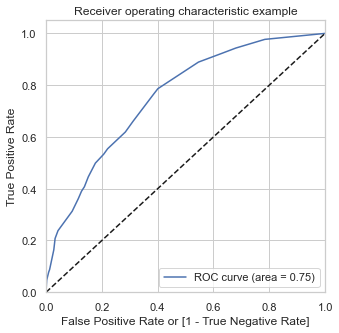

In [103]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_v1.Attrition, 
                                         y_train_pred_final_v1.Attrition_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final_v1.Attrition, y_train_pred_final_v1.Attrition_Prob)

### 2. Undersampling

In [80]:
# Removing some observations of the majority class
y = data_dummies.Attrition
X = data_dummies.drop('Attrition', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)
# Concatenating the training data back together
X = pd.concat([X_train, y_train], axis=1)
not_attrition = X[X.Attrition == 0]
attrition = X[X.Attrition == 1]

not_attrition_downsampled = resample(not_attrition, replace=False, n_samples = len(attrition), random_state= 27)
downsampled = pd.concat([not_attrition_downsampled, attrition])
downsampled.Attrition.value_counts()

0    163
1    163
Name: Attrition, dtype: int64

In [81]:
# Checking the accuracy of the model using the dataset: upsampled
X_train = downsampled.drop("Attrition",axis=1)
y_train = downsampled.Attrition

downsampled_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, downsampled_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  326
Model:                            GLM   Df Residuals:                      320
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -187.85
Date:                Thu, 02 Dec 2021   Deviance:                       375.69
Time:                        09:46:46   Pearson chi2:                     317.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.5711      0.246     -2.325      0.020      -1.053      -0.090
OverTime                              1.5753      0.267      5.895      0.000       1.052       2.099
BusinessTravel_Travel_Frequently      0.8229      0.306      2.686      0.007       0.222       1.423
Department_Research & Development    -1.1707      0.287     -4.077      0.000      -1.733      -0.608
JobRole_Laboratory Technician         0.8859      0.337      2.625      0.009       0.225       1.547
MaritalStatus_Single                  0.9499      0.265      3.586      0.000       0.431       1.469
=====================================================================================================
"""

In [82]:
y_train_pred = res.predict(downsampled_sm).values.reshape(-1)
y_train_pred_final_v2 = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})

y_train_pred_final_v2['predicted'] = y_train_pred_final_v2.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_v2['predicted_2'] = y_train_pred_final_v2.Attrition_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_train_pred_final_v2['predicted_1'] = y_train_pred_final_v2.Attrition_Prob.map(lambda x: 1 if x > 0.1 else 0)
# Checking each of these columns' accuracies
print("Using 0.5 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted))
print("Using 0.2 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted_2))
print("Using 0.1 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted_1))

Using 0.5 as the criteria:  0.6748466257668712
Using 0.2 as the criteria:  0.6196319018404908
Using 0.1 as the criteria:  0.5


In [83]:
# Checking with probability cut off of 0.5
scores(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted)
confusion = metrics.confusion_matrix(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted)
print(confusion)

Precision score: 67.70186335403726
Recall score: 66.87116564417178
[[111  52]
 [ 54 109]]


In [84]:
# Using 0.2 as the cut off
scores(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted_2)
confusion = metrics.confusion_matrix(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted_2)
print(confusion)

Precision score: 57.03971119133574
Recall score: 96.93251533742331
[[ 44 119]
 [  5 158]]


In [85]:
# Using 0.1 as the cut off
scores(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted_1)
confusion = metrics.confusion_matrix(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.predicted_1)
print(confusion)

Precision score: 50.0
Recall score: 100.0
[[  0 163]
 [  0 163]]


### ROC Curve from Model 3

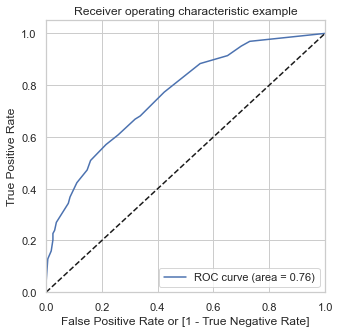

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_v2.Attrition, 
                                         y_train_pred_final_v2.Attrition_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final_v2.Attrition, y_train_pred_final_v2.Attrition_Prob)

### 3. Using SMOTE: Synthetic Minority Oversampling Technique

In [86]:
# conda install -c conda-forge imbalanced-learn

In [89]:
# SMOTE uses nearest neighbours to generate new and synthetic data we can use for training
from statsmodels.api import add_constant 
from imblearn.over_sampling import SMOTE

y = data_dummies.Attrition
X = data_dummies.drop('Attrition', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)
# Concatenating the training data back together
smote = SMOTE(random_state=27)
X_train, y_train, smote.fit_resample(X_train, y_train)
smote_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, smote_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1023
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -389.97
Date:                Thu, 02 Dec 2021   Deviance:                       779.95
Time:                        09:51:26   Pearson chi2:                 1.00e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.3141      0.188    -12.309      0.000      -2.683      -1.946
OverTime                              1.5191      0.186      8.165      0.000       1.154       1.884
BusinessTravel_Travel_Frequently      0.7321      0.212      3.457      0.001       0.317       1.147
Department_Research & Development    -0.9840      0.211     -4.671      0.000      -1.397      -0.571
JobRole_Laboratory Technician         1.0054      0.251      4.000      0.000       0.513       1.498
MaritalStatus_Single                  0.7997      0.186      4.289      0.000       0.434       1.165
=====================================================================================================
"""

In [90]:
y_train_pred = res.predict(smote_sm).values.reshape(-1)
y_train_pred_final_v3 = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})

y_train_pred_final_v3['predicted'] = y_train_pred_final_v3.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_v3['predicted_2'] = y_train_pred_final_v3.Attrition_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_train_pred_final_v3['predicted_1'] = y_train_pred_final_v3.Attrition_Prob.map(lambda x: 1 if x > 0.1 else 0)
# Checking each of these columns' accuracies
print("Using 0.5 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v3.Attrition, y_train_pred_final_v3.predicted))
print("Using 0.2 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v3.Attrition, y_train_pred_final_v3.predicted_2))
print("Using 0.1 as the criteria: ",metrics.accuracy_score(y_train_pred_final_v3.Attrition, y_train_pred_final_v3.predicted_1))

Using 0.5 as the criteria:  0.8503401360544217
Using 0.2 as the criteria:  0.7735665694849369
Using 0.1 as the criteria:  0.6268221574344023


In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_v3[i]= y_train_pred_final_v3.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_v3.head()

,Attrition,Attrition_Prob,predicted,predicted_2,predicted_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.089965,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.091736,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.091736,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.035638,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0.173567,0,0,1,1,1,0,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_v3.Attrition, y_train_pred_final_v3[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.158406  1.000000  0.000000
0.1   0.1  0.626822  0.773006  0.599307
0.2   0.2  0.773567  0.509202  0.823326
0.3   0.3  0.792031  0.417178  0.862587
0.4   0.4  0.843537  0.239264  0.957275
0.5   0.5  0.850340  0.171779  0.978060
0.6   0.6  0.845481  0.036810  0.997691
0.7   0.7  0.841594  0.000000  1.000000
0.8   0.8  0.841594  0.000000  1.000000
0.9   0.9  0.841594  0.000000  1.000000


#### Making predictions on the test set using SMOTE results

In [93]:
# Transforming the X_test
X_test[to_scale] = scaler.transform(X_test[to_scale])
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Employee Number'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Attrition,Employee Number,0
0,0,143,0.075971
1,0,680,0.075971
2,1,2,0.506527
3,1,0,0.501168
4,1,777,0.183479


In [94]:
y_pred_final = y_pred_final.rename(columns={0:'Attrition_Prob'})
y_pred_final['final_predicted'] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>0.5 else 0)
y_pred_final['final_predicted_2'] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>0.2 else 0)
y_pred_final['final_predicted_1'] = y_pred_final['Attrition_Prob'].map(lambda x:1 if x>0.1 else 0)

In [98]:
# Confusion matrix and scores with the probability score of 0.5
scores(y_pred_final.Attrition, y_pred_final.final_predicted)
confusion = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted)
print(confusion)
print("Accuracy score: ",metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted))

Precision score: 70.83333333333334
Recall score: 22.972972972972975
[[360   7]
 [ 57  17]]
Accuracy score:  0.854875283446712


In [99]:
# Confusion matrix and scores with the probability score of 0.2
scores(y_pred_final.Attrition, y_pred_final.final_predicted_2)
confusion = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted_2)
print(confusion)
print("Accuracy score: ",metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted_2))

Precision score: 41.0
Recall score: 55.4054054054054
[[308  59]
 [ 33  41]]
Accuracy score:  0.7913832199546486


In [100]:
# Confusion matrix and scores with the probability score of 0.1
scores(y_pred_final.Attrition, y_pred_final.final_predicted_1)
confusion = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted_1)
print(confusion)
print("Accuracy score: ",metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted_1))

Precision score: 26.605504587155966
Recall score: 78.37837837837837
[[207 160]
 [ 16  58]]
Accuracy score:  0.6009070294784581


### ROC Curve from Model 4

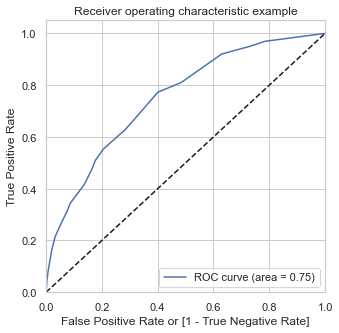

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_v3.Attrition, 
                                         y_train_pred_final_v3.Attrition_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final_v3.Attrition, y_train_pred_final_v3.Attrition_Prob)

1. This project recommends oversampling, because this gives the highest recall and lowest precision
2. The probability cut off recommended is 0.1 to ensure highest false positives and lowest false negatives

## The End